<a href="https://colab.research.google.com/github/Paulo-Moura14/Programacao-Deep-Learning/blob/main/1a_Questao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1ª Questão
Equipe:
Angélica Gabas,
Davi Rolim,
Paulo Moura,
Rinaldo Silva

Na primeira questão será executada a convolução de um filtro sobre imagens selecionadas. As figuras utilizadas são Lenna.png e predios.jpeg, conforme abaixo:

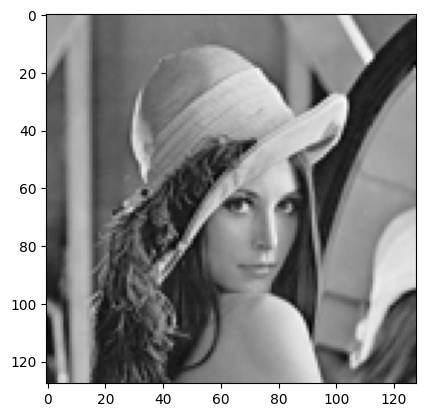

In [ ]:
from abrirFiguras import getListOfListImage, getImageFromListofList

listOfListImageLenna, listOfListNewImageLenna = getListOfListImage(showImage=True)

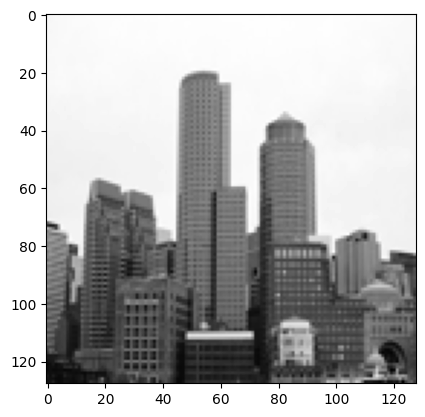

In [ ]:
listOfListImagePredios, listOfListNewImagePredios = getListOfListImage(imgPath="predios.jpeg", showImage=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def posicoes_borda(matriz):

    posicoes = []

    # Obtém as posições da borda superior
    posicoes.extend([(0, j) for j in range(len(matriz[0]))])

    # Obtém as posições da borda inferior
    posicoes.extend([(len(matriz) - 1, j) for j in range(len(matriz[0]))])

    # Obtém as posições da borda esquerda (exceto as já incluídas)
    posicoes.extend([(i, 0) for i in range(1, len(matriz) - 1)])

    # Obtém as posições da borda direita (exceto as já incluídas)
    posicoes.extend([(i, len(matriz[0]) - 1) for i in range(1, len(matriz) - 1)])

    return posicoes

In [ ]:
# Multiplica ponto a ponto duas matrizes quadradas iguais e somo o resultado
def mult_ponto_a_ponto(matriz1, matriz2):
  soma = 0
  for i in range(len(matriz1)):
    for j in range(len(matriz1[0])):
      soma += matriz1[i][j] * matriz2[i][j]

  return soma

In [ ]:
def get_3x3_slice(matrix, row, col):
    # Verifica se a matriz é maior que 3x3
    if len(matrix) < 3 or any(len(row) < 3 for row in matrix):
        return None

    # Extrai a matriz 3x3 em volta da posição dada
    slice_3x3 = [row[col-1:col+2] for row in matrix[row-1:row+2]]

    return slice_3x3

In [ ]:
borda_posicoesLenna = posicoes_borda(listOfListImageLenna)
print((126, 126) in borda_posicoesLenna, len(listOfListImageLenna))

False 128


In [ ]:
borda_posicoesPredios = posicoes_borda(listOfListImagePredios)
print((126, 126) in borda_posicoesPredios, len(listOfListImagePredios))

False 128


In [ ]:
filter1 = [[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]]
filter2 = [[0,0,0],[1,0,0],[0,0,0]]
filter3 = [[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]
filter4 = [[1,0,-1],[2,0,-2],[1,0,-1]]
filter5 = [[0,-1,0],[-1,5,-1],[0,-1,0]]

O filter 1 é chamado de blur e faz uma média simples entre os pixels de cada região e por isso reduz a resolução da imagem, suavizando-a.

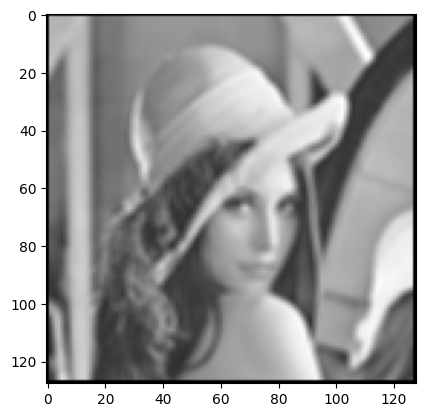

In [ ]:
for i in range(len(listOfListImageLenna)):
  for j in range(len(listOfListImageLenna)):
    if (i, j) not in borda_posicoesLenna:
      listOfListNewImageLenna[i][j] = mult_ponto_a_ponto(filter1, get_3x3_slice(listOfListImageLenna, i, j))
getImageFromListofList(listOfListNewImageLenna)

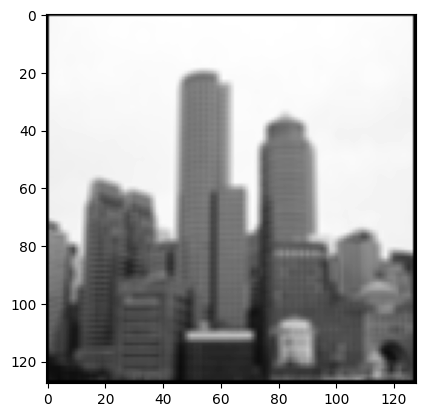

In [ ]:
for i in range(len(listOfListImagePredios)):
  for j in range(len(listOfListImagePredios)):
    if (i, j) not in borda_posicoesPredios:
      listOfListNewImagePredios[i][j] = mult_ponto_a_ponto(filter1, get_3x3_slice(listOfListImagePredios, i, j))
getImageFromListofList(listOfListNewImagePredios)

O filter 2 faz um deslocamento de 1 pixel para a direita, substituindo o valor de cada pixel pelo do pixel à sua esquerda.

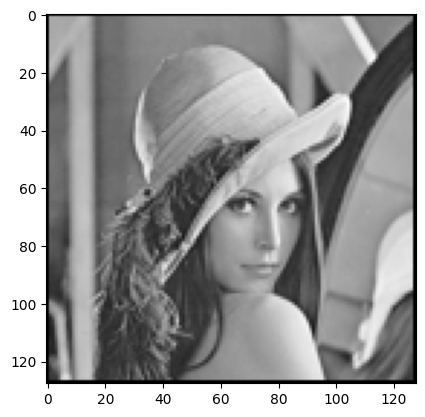

In [ ]:
for i in range(len(listOfListImageLenna)):
  for j in range(len(listOfListImageLenna)):
    if (i, j) not in borda_posicoesLenna:
      listOfListNewImageLenna[i][j] = mult_ponto_a_ponto(filter2, get_3x3_slice(listOfListImageLenna, i, j))
getImageFromListofList(listOfListNewImageLenna)

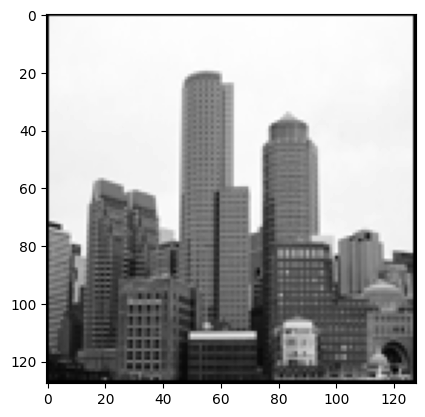

In [ ]:
for i in range(len(listOfListImagePredios)):
  for j in range(len(listOfListImagePredios)):
    if (i, j) not in borda_posicoesPredios:
      listOfListNewImagePredios[i][j] = mult_ponto_a_ponto(filter2, get_3x3_slice(listOfListImagePredios, i, j))
getImageFromListofList(listOfListNewImagePredios)

O filter3 é conhecido é do tipo [Edge detector](https://en.wikipedia.org/wiki/Kernel_(image_processing)) e tem a característica de identificar na imagem regiões onde há mudanças bruscas na intensidade luminosa de uma região de pixels e realça curvas.

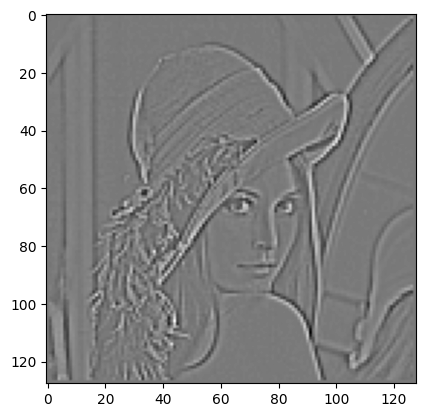

In [ ]:
for i in range(len(listOfListImageLenna)):
  for j in range(len(listOfListImageLenna)):
    if (i, j) not in borda_posicoesLenna:
      listOfListNewImageLenna[i][j] = mult_ponto_a_ponto(filter3, get_3x3_slice(listOfListImageLenna, i, j))
getImageFromListofList(listOfListNewImageLenna)

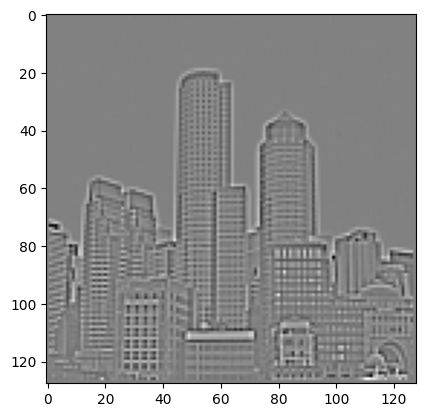

In [ ]:
for i in range(len(listOfListImagePredios)):
  for j in range(len(listOfListImagePredios)):
    if (i, j) not in borda_posicoesPredios:
      listOfListNewImagePredios[i][j] = mult_ponto_a_ponto(filter3, get_3x3_slice(listOfListImagePredios, i, j))
getImageFromListofList(listOfListNewImagePredios)

O filter4 é similar ao filter3 por também identificar as bordas da imagem. Ele é conhecido como [Sobel.](https://en.wikipedia.org/wiki/Sobel_operator)

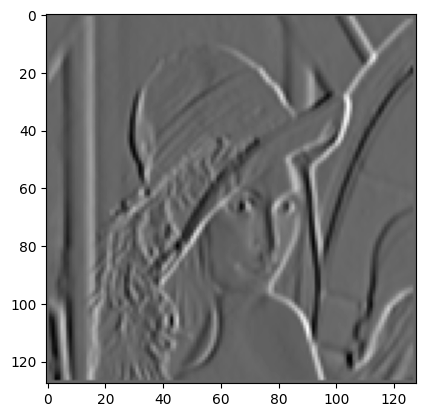

In [ ]:
for i in range(len(listOfListImageLenna)):
  for j in range(len(listOfListImageLenna)):
    if (i, j) not in borda_posicoesLenna:
      listOfListNewImageLenna[i][j] = mult_ponto_a_ponto(filter4, get_3x3_slice(listOfListImageLenna, i, j))
getImageFromListofList(listOfListNewImageLenna)

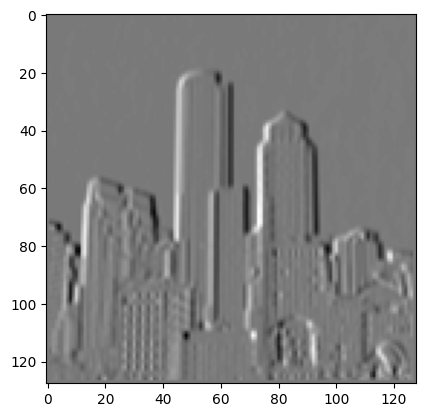

In [ ]:
for i in range(len(listOfListImagePredios)):
  for j in range(len(listOfListImagePredios)):
    if (i, j) not in borda_posicoesPredios:
      listOfListNewImagePredios[i][j] = mult_ponto_a_ponto(filter4, get_3x3_slice(listOfListImagePredios, i, j))
getImageFromListofList(listOfListNewImagePredios)

O filter5 que escolhemos é chamado de "sharpen" e tem a função de realçar as bordas e detalhes da imagem.

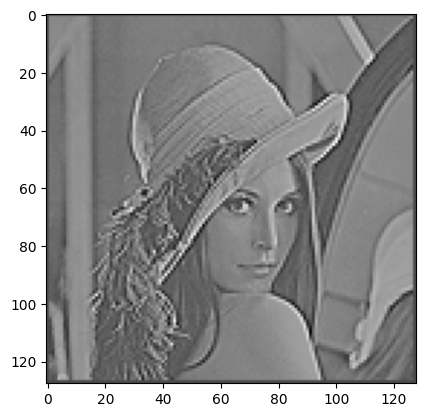

In [ ]:
for i in range(len(listOfListImageLenna)):
  for j in range(len(listOfListImageLenna)):
    if (i, j) not in borda_posicoesLenna:
      listOfListNewImageLenna[i][j] = mult_ponto_a_ponto(filter5, get_3x3_slice(listOfListImageLenna, i, j))
getImageFromListofList(listOfListNewImageLenna)

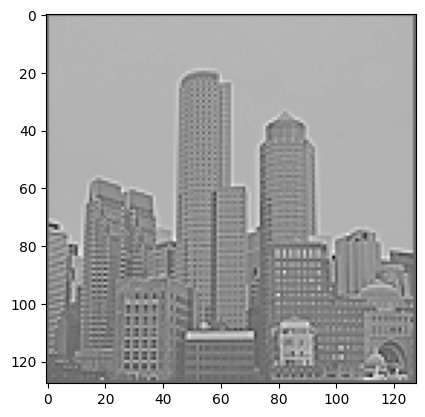

In [ ]:
for i in range(len(listOfListImagePredios)):
  for j in range(len(listOfListImagePredios)):
    if (i, j) not in borda_posicoesPredios:
      listOfListNewImagePredios[i][j] = mult_ponto_a_ponto(filter5, get_3x3_slice(listOfListImagePredios, i, j))
getImageFromListofList(listOfListNewImagePredios)